In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
import os

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import nltk
import os
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import nltk

nltk.download('stopwords')
import matplotlib.pyplot as plt
import pandas as pd

nltk.download('punkt')
import string
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re   

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
os.chdir("/content/gdrive/My Drive/css/covid_all/after")
df3 = pd.read_csv("/content/gdrive/My Drive/css/covid_all/after/covid_all_after_nodublication.csv", engine = 'python')
df3['tweet'] = df3['tweet'].astype(str)

In [0]:
df3.tweet = df3.tweet.apply(lambda x: re.sub(r"İ", "i",x)) #harika calisiyor
df3.tweet = df3.tweet.apply(lambda x: x.lower())
df3.loc[:,"tweet"] = df3.tweet.apply(lambda x : " ".join(re.findall('[\w]+',x)))

In [0]:
df3.head(3)

,id,date,time,user_id,username,tweet,hashtags,retweet,user_rt,mentions
0,1247313122517553152,2020-04-07,02:59:57,1.217102e+18,communlife,iyiyim aşkım ya sen corona pic twitter com wjy...,['#corona'],False,NaN,[]
1,1247313042485809152,2020-04-07,02:59:37,1.702799e+09,terriblefg,rastgele diyerek charim corona ve kopegim nazl...,[],False,NaN,[]
2,1247313030679011330,2020-04-07,02:59:35,1.730053e+09,merithedeli,corona bitince ilk iş ankaraya gitme planları ...,[],False,NaN,['thursdaaygirl']


In [0]:
top_N = 10


txt = df3.tweet.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

user_defined_stop_words = ['1', 'ye', 'nin' ,'nın',  'koronavirüs', 'olsun', 'karşı' , 'covid_19', 'artık', '3', 'sayısı' , 'olarak', 'oldu', 'olan', '2' , 'nedeniyle','bile' , 'sonra' ,'sen','virüs', 'ben', 'vaka' , 'son', 'yeni', 'sayi', 'sayisi','virüsü','bir','com','twitter', 'kadar', 'dan' , 'değil' ,'pic' , 'http', 'https' , 'www' , 'status' , 'var', 'bi', 'mi','yok', 'bu' , 've', 'korona' ,'corona' ,'19' ,'kovid', 'covid'] 

i = nltk.corpus.stopwords.words('turkish')
j = list(string.punctuation) + user_defined_stop_words
stopwords = set(i).union(j)


words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt3 = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt3)
print('=' * 60)

rslt3 = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

All frequencies, including STOPWORDS:
      Word  Frequency
0   corona    1005583
1   korona     469695
2      com     458013
3  twitter     349408
4      bir     269508
5       bu     262442
6       ve     249199
7      pic     248726
8    https     216313
9       da     183365


In [0]:
df2 = pd.read_csv("/content/gdrive/My Drive/css/covid_all/before/covid_all_nodublication.csv", engine = 'python')

df2['tweet'] = df2['tweet'].astype(str)

In [0]:
df2['tweet'] = df2['tweet'].astype(str)
df2.tweet = df2.tweet.apply(lambda x: re.sub(r"İ", "i",x)) #harika calisiyor
df2.tweet = df2.tweet.apply(lambda x: x.lower())
df2.loc[:,"tweet"] = df2.tweet.apply(lambda x : " ".join(re.findall('[\w]+',x)))

In [0]:
df2.head()

,id,date,time,user_id,username,tweet,hashtags,retweet,user_rt,mentions
0,1237528353789202433,2020-03-11,02:58:46,3.054582e+08,zelihakaradal,bakanlıktan mı bekliyorsunuz bu açıklamayı ina...,[],False,NaN,['soncahilbukucu']
1,1237528069620944896,2020-03-11,02:57:38,2.391747e+09,ugur_met,getafe başkanı italya ya gitmeyeceğiz demiş ba...,[],False,NaN,[]
2,1237527952532705282,2020-03-11,02:57:10,1.180932e+18,tarikdoganoglu,bu dünya justinyen ve kara vebayı atlattı o es...,['#corona'],False,NaN,[]
3,1237527848631451650,2020-03-11,02:56:45,4.397234e+09,ayaklarinoyunu,covid 19 yüzünden millet çekinip camilere gitm...,[],False,NaN,"['can_atakli_', 'tele1comtr']"
4,1237527701868523520,2020-03-11,02:56:10,3.425718e+09,soreszeyno,coronavirus yani covid 19 hakkında çok fazla b...,[],False,NaN,[]


All frequencies, including STOPWORDS:
      Word  Frequency
0   corona     140744
1      com      54734
2  twitter      40010
3      bir      35740
4       da      33750
5   virüsü      29384
6     vaka      27939
7       bu      27837
8    https      27825
9      pic      27288


<Figure size 2160x2160 with 0 Axes>

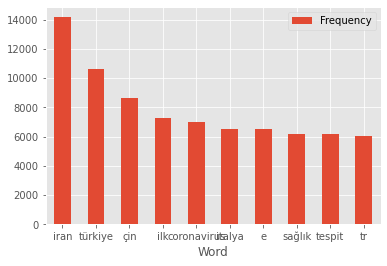

In [0]:
top_N = 10


txt = df2.tweet.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

user_defined_stop_words = ['1', 'ye', 'nin' ,'nın',  'koronavirüs', 'olsun', 'karşı' , 'covid_19', 'artık', '3', 'sayısı' , 'olarak', 'oldu', 'olan', '2' , 'nedeniyle','bile' , 'sonra' ,'sen','virüs', 'ben', 'vaka' , 'son', 'yeni', 'sayi', 'sayisi','virüsü','bir','com','twitter', 'kadar', 'dan' , 'değil' ,'pic' , 'http', 'https' , 'www' , 'status' , 'var', 'bi', 'mi','yok', 'bu' , 've', 'korona' ,'corona' ,'19' ,'kovid', 'covid'] 

i = nltk.corpus.stopwords.words('turkish')
j = list(string.punctuation) + user_defined_stop_words
stopwords = set(i).union(j)


words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')
plt.figure(figsize=(30,30))
rslt.plot.bar(rot=0)
plt.savefig('ulkeler_before.png')

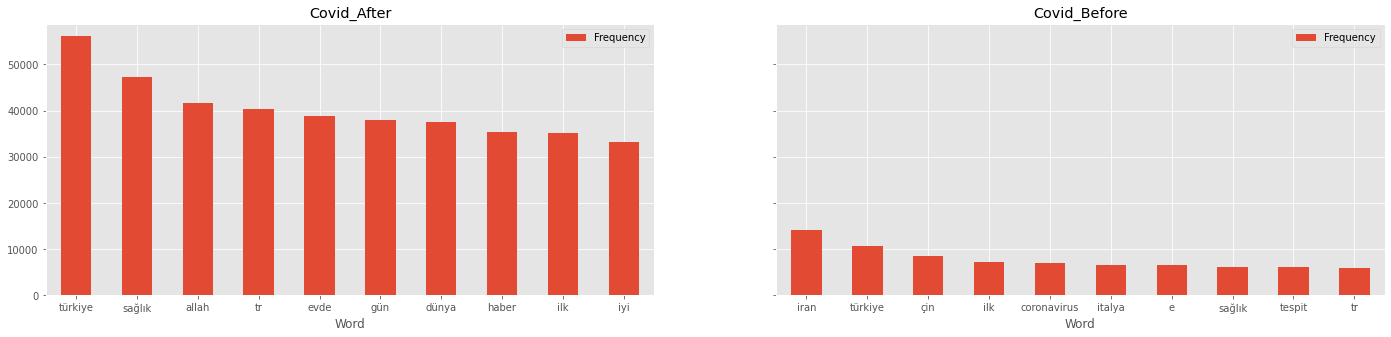

In [0]:
fig, (ax1, ax2) =  plt.subplots(1,2, sharex=False, sharey= True, figsize=(24,5)) 
rslt.plot.bar(rot=0, ax =ax2 , title = "Covid_Before" )
rslt3.plot.bar(rot=0, ax =ax1 , title = "Covid_After" )
plt.savefig('Covid_comparison.png',dpi=300)